In [19]:
import numpy as np
from numpy import array, matmul, dot, zeros, ones, eye, diag, polyfit, transpose
from numpy.linalg import solve, norm, det, eig, eigh, eigvals, eigvalsh, inv, lstsq, svd, matrix_power, matrix_rank
from numpy.random import randn, rand, randint, seed
from math import pi, sin, cos
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from string import ascii_lowercase

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# a) Briefly explain your items and graph

The items represent a fictional social network with 10 people

In [20]:
G = nx.Graph()
pos=nx.spring_layout(G)

'''
1 = Tom M
2 = Tom K
3 = Marko
4 = Wessel
5 = Daan S
6 = Daan V
7 = Ruward
8 = Isabel
9 = Thomas
10 = Fabian
'''
names = ['TomM', 'TomK', 'Marko', 'Wessel', 'Jolijn', 'DaanV', 'Ruward', 'Isabel','DaanS' , 'Fabian']


G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
G.add_edges_from([(1,2), (1,3), (2,1), (2,4), (3,1), (3,4), (4,2), (4,3), (4,5), (4,6), (4,7),
                  (5, 4), (6, 4), (6,7), (6,10), (7, 4), (7,6), (7,8), (7,10), (8,7), (8,9),
                  (9,8), (9,10), (10,6), (10,7), (10,9)])

print("Graph G has", len(G.nodes), "nodes and", len(G.edges()), "edges")


Graph G has 10 nodes and 13 edges


# B) Plot the graph, using appropriate software or by hand.
Chose to do it with the networkx package in python with a spring layout

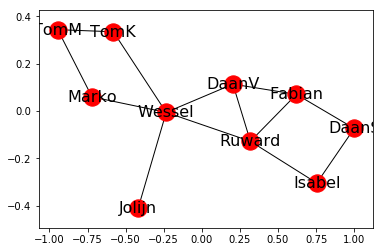

In [21]:
pos = nx.spring_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = names[idx]
    
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=16)
plt.show()

# C) Set up the Laplacian matrix

In [22]:
adjacency = nx.to_numpy_array(G)
Degree = np.array([[2,0,0,0,0,0,0,0,0,0],
                   [0,2,0,0,0,0,0,0,0,0],
                   [0,0,2,0,0,0,0,0,0,0],
                   [0,0,0,5,0,0,0,0,0,0],
                   [0,0,0,0,1,0,0,0,0,0],
                   [0,0,0,0,0,3,0,0,0,0],
                   [0,0,0,0,0,0,4,0,0,0],
                   [0,0,0,0,0,0,0,2,0,0],
                   [0,0,0,0,0,0,0,0,2,0],
                   [0,0,0,0,0,0,0,0,0,3]])

Laplacian = Degree - adjacency
Laplacian

array([[ 2., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1.,  5., -1., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  3., -1.,  0.,  0., -1.],
       [ 0.,  0.,  0., -1.,  0., -1.,  4., -1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1.,  0., -1.,  3.]])

# D) Compute the Fiedler vector, the eigenvector corresponding to the second smallest eigenvalue (smallest should be 0)

In [23]:
vals, vecs = eig(Laplacian)
vecs = vecs[:,np.argsort(vals)] # sorts vectors based on vals
vals = vals[np.argsort(vals)] # sorts vals


# print results
for i, value in enumerate(vals):
    if i == 1:
        print("Eigenvector:", vecs[:,i], ", Eigenvalue:", value)
print("\n")

print(names)

Eigenvector: [ 0.44142123  0.35309129  0.35309129  0.12345172  0.20582389 -0.14463874
 -0.19951538 -0.39705991 -0.43569827 -0.29996711] , Eigenvalue: 0.4002070498470771


['TomM', 'TomK', 'Marko', 'Wessel', 'Jolijn', 'DaanV', 'Ruward', 'Isabel', 'DaanS', 'Fabian']


This means that TomM, TomK, Marko, Wessel and Jolijn are in 1 group 
<br>
and DaanV, Ruward, Isabel, DaanS and Fabian are in the other group
<br>
<br>
This seems logical when looking at the plot above

# E) Color the nodes corresponding to the sign of the Fiedler vector

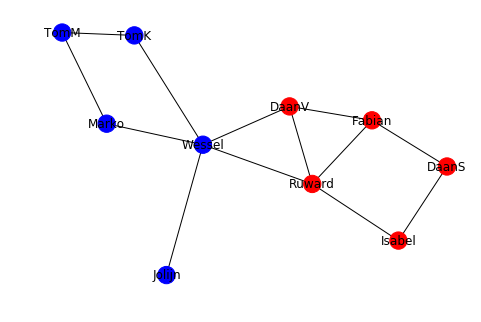

In [24]:
colorMap = []
Group1 = [1,2,3,4,5]
Group2 = [6,7,8,9,10]
for node in G.nodes():
    if node in Group1:
        colorMap.append('blue')
    else:
        colorMap.append('red')
        
nx.draw(G,pos, node_color = colorMap)
nx.draw_networkx_labels(G, pos, labels, font_size=12)
plt.show()

# F) take another graph, with more/fewer edges (less in this case)


In [26]:
G = nx.Graph()
pos=nx.spring_layout(G)

'''
1 = Tom M
2 = Tom K
3 = Marko
4 = Wessel
5 = Daan S
6 = Daan V
7 = Ruward
8 = Isabel
9 = Thomas
10 = Fabian
'''
names = ['TomM', 'TomK', 'Marko', 'Wessel', 'Jolijn', 'DaanV', 'Ruward', 'Isabel','DaanS' , 'Fabian']


G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
G.add_edges_from([(1,2), (1,3), (2,1), (2,4), (3,1), (3,5), (4,2), (4,5), (4,6), (5,3),
                  (5, 4), (6, 4), (6,7), (6,10), (7,6), (7,8), (8,7), (8,9),
                  (9,8), (9,10), (10,6), (10,9)])

print("Graph G has", len(G.nodes), "nodes and", len(G.edges()), "edges")


Graph G has 10 nodes and 11 edges


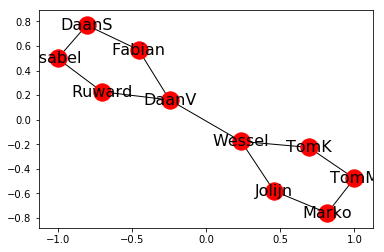

In [27]:
pos = nx.spring_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = names[idx]
    
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=16)
plt.show()

In [28]:
adjacency = nx.to_numpy_array(G)
Degree = np.array([[2,0,0,0,0,0,0,0,0,0],
                   [0,2,0,0,0,0,0,0,0,0],
                   [0,0,2,0,0,0,0,0,0,0],
                   [0,0,0,3,0,0,0,0,0,0],
                   [0,0,0,0,2,0,0,0,0,0],
                   [0,0,0,0,0,3,0,0,0,0],
                   [0,0,0,0,0,0,2,0,0,0],
                   [0,0,0,0,0,0,0,2,0,0],
                   [0,0,0,0,0,0,0,0,2,0],
                   [0,0,0,0,0,0,0,0,0,2]])

Laplacian = Degree - adjacency
Laplacian

array([[ 2., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  2.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  3., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  3., -1.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  2.]])

Eigenvector: [-0.38199583 -0.30226866 -0.38199583 -0.15945434 -0.30226866  0.15945434
  0.30226866  0.38199583  0.38199583  0.30226866] , Eigenvalue: 0.20871215252207967


['TomM', 'TomK', 'Marko', 'Wessel', 'Jolijn', 'DaanV', 'Ruward', 'Isabel', 'DaanS', 'Fabian']


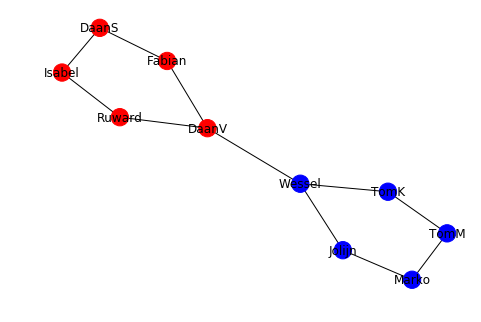

In [29]:
vals, vecs = eig(Laplacian)
vecs = vecs[:,np.argsort(vals)] # sorts vectors based on vals
vals = vals[np.argsort(vals)] # sorts vals

colorMap = []
# print results
for i, value in enumerate(vals):
    if i == 1:
        print("Eigenvector:", vecs[:,i], ", Eigenvalue:", value)
        for j in vecs[:,i]:
            if j < 0:
                colorMap.append('blue')
            else:
                colorMap.append('red')
            
print("\n")

print(names)
nx.draw(G, pos, node_color=colorMap)
nx.draw_networkx_labels(G, pos, labels, font_size=12)
plt.show()